In [1]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots

import pandas as pd
import xarray as xr
import seaborn as sns
import warnings
import logging
# sns.set()

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist

## compute all densities per cs

In [2]:
### WINTER + SUMMER###
settings_paths = [
  "settings/arpege_winter_30d.yaml", 
  "settings/arpege_summer_30d.yaml", 

  "settings/ifs_winter_30d.yaml" , 
  "settings/ifs_summer_30d.yaml" , 
  
  "settings/mpas_winter_30d.yaml", 
  "settings/mpas_summer_30d.yaml", 

  "settings/screamv1_winter_30d.yaml",
  "settings/screamv1_summer_30d.yaml", 
 
  "settings/sam_winter_30d.yaml", 
  "settings/sam_summer_30d.yaml", 

  "settings/um_winter_30d.yaml",
  "settings/um_summer_30d.yaml",

  "settings/xshield_winter_30d.yaml" , 
  "settings/fv3_summer_30d.yaml", 
  
  "settings/geos_winter_30d.yaml", 
  "settings/grist_winter_30d.yaml", 
  "settings/nicam_summer_30d.yaml", 

  "settings/obs_winter_30d.yaml", 
  "settings/obs_summer_30d.yaml", 
               ]

nd = 4 
nbpd = 20

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = nbpd,  nd=nd, overwrite = True, dist_mask = False) for gr in grs]

Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/IFS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/IFS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SCREAMv1_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SCREAMv1_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/UM_Winter_lowRes_Tropics/var

/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recom

/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


# fig 7 

In [3]:
from skimage import measure # pylance: disable=import-error 
from scipy.optimize import minimize
import plotly.graph_objects as go
from shapely.geometry import LineString
import matplotlib.patheffects as path_effects
from matplotlib.patches import Polygon as MplPolygon

def find_plot_contour(self, ax_show , N_branch=80, offset_low = 1, offset_up=1, color = 'k', lstyle = '--', model_name = None):
    Z = self.norm_density.T
    # -- Branches
    Z_contour = np.copy(Z)
    # Z_contour[18:, 18:] = 1 ## this number actually depends on nd and nbpd and the general shape of the Y 
    cont = measure.find_contours(Z_contour, 1)
    N = N_branch
    # fit
    popt_1, x_1, y_1, popt_2, x_2, y_2, func = self._fit_branches(cont,N, offset_low, offset_up)
    x_branch_2 = y_branch_1 = np.linspace(5,N_branch,N_branch)
    y_branch_2 = func(x_branch_2,*popt_2)
    x_branch_1 = func(y_branch_1,*popt_1)

    # Create line strings for intersection
    curve1 = LineString(np.column_stack((x_branch_1, y_branch_1)))
    curve2 = LineString(np.column_stack((x_branch_2, y_branch_2)))
    
    if ax_show is not False : 
        # show branches
        ax_show.plot(x_branch_1,y_branch_1, color = color, linestyle = lstyle, linewidth = 3, alpha = 0.5)
        ax_show.plot(x_branch_2,y_branch_2, color = color, linestyle = lstyle, linewidth = 3, alpha = 0.5, label  = model_name)

    return ax_show, curve1, curve2

def plot_kite(jd, fig=None, ax=None):
    if fig is None : 
        fig, ax = plt.subplots(1, 1)
    # Plot the initial polygons
    model_name = jd.name.split("_")[0]
    _, curve1, curve2 = find_plot_contour(jd, ax_show = False, N_branch=81, offset_low = 1, offset_up=1, color = 'k', lstyle="--", model_name = model_name+" Summer")

    curve1_coords = np.array(curve1.coords)

    km90_vertices = []
    first_index = np.argmin(np.abs(curve1_coords[:,1]-20))
    last_index = np.argmin(np.abs(curve1_coords[:,1]-40))
    km90_vertices.extend(curve1_coords[first_index:last_index+1])  # Add a segment of curve1

    km90_vertices.append((40, 40))  
    km90_vertices.append((20, 20))  

    km99_vertices = []
    first_index = np.argmin(np.abs(curve1_coords[:,1]-40))
    last_index = np.argmin(np.abs(curve1_coords[:,1]-81))
    km99_vertices.extend(curve1_coords[first_index:last_index+1])  # Add a segment of curve1

    km99_vertices.append((81, 81))  
    km99_vertices.append((40, 40))  

    curve1_coords = np.array(curve2.coords)

    dd90_vertices = []
    first_index = np.argmin(np.abs(curve1_coords[:,0]-20))
    last_index = np.argmin(np.abs(curve1_coords[:,0]-40))
    dd90_vertices.extend(curve1_coords[first_index:last_index+1])  # Add a segment of curve1

    dd90_vertices.append((40, 40))  
    dd90_vertices.append((20, 20))  

    dd99_vertices = []
    first_index = np.argmin(np.abs(curve1_coords[:,0]-40))
    last_index = np.argmin(np.abs(curve1_coords[:,0]-81))
    dd99_vertices.extend(curve1_coords[first_index:last_index+1])  # Add a segment of curve1

    dd99_vertices.append((81, 81))  
    dd99_vertices.append((40, 40))  

    polygons = [
        (km90_vertices, 'green', '90th km'),
        (km99_vertices, 'lime', '99th km'),
        (dd99_vertices, 'cyan', '99th dd'),
        (dd90_vertices, 'blue', '90th dd')
    ]

    # Create a new patch with the constructed vertices
    for vertices, color, label in polygons:
        polygon = MplPolygon(vertices, closed=True, edgecolor=color, facecolor=color, linewidth=2, linestyle='--', alpha=0.2)
        ax.add_patch(polygon)
        
        # Calculate approximate center for text placement
        x_coords, y_coords = zip(*vertices)
        center_x = np.mean(x_coords)
        center_y = np.mean(y_coords)
        
        # Add text annotation
        text = ax.text(center_x, center_y, label, color=color, fontsize=12, ha='center', va='center', weight='bold')
        text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='black'), path_effects.Normal()])
    
    return None

OBS_Winter_lowRes_Tropics


/home/mcarenso/code/tempest/tempest/joint_distrib.py:464: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/home/mcarenso/code/tempest/tempest/joint_distrib.py:464: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


XSHiELD_Winter_lowRes_Tropics


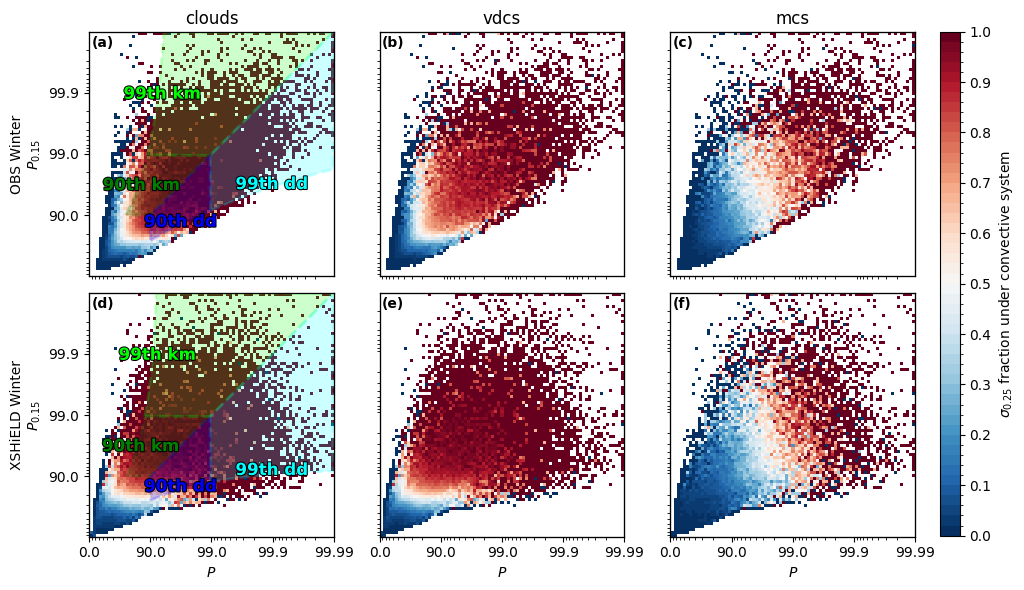

In [4]:
jds_plot = [jds[-2], jds[-7]]

fig, axs  = plt.subplots(len(jds_plot), 3, figsize = (9.55, 6)) #, sharex=True, sharey=True)

letters = ["("+chr(97 + i)+")" for i in range(3*len(jds_plot))]  

plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.01, hspace=0.01)

cloud_cond_var_ids = ["clouds_cond_prec_25", "vdcs_cond_prec_25", "mcs_cond_prec_25"]

cmap = plt.cm.RdBu_r
values_and_boundaries = np.arange(0, 1.02, 0.02)
values = values_and_boundaries[::5]
boundaries  = values_and_boundaries
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)

for i, jd, gr, axes in zip(range(len(jds_plot)), jds_plot, grs, axs):
    print(jd.name)
    for j, cloud_cond_var_id, ax in zip(range(len(axes)), cloud_cond_var_ids, axes):
        if i == 0 : 
            title = cloud_cond_var_id.split("_")[0]
        else : 
            title = None
        letter = letters[3*i+j]
        ax.text(0.01, 0.94, letter,  transform=ax.transAxes, fontweight='bold')
        
        ax, cbar, ax_show, density = jd.plot_var_id_func_over_jdist(cloud_cond_var_id, title=title,  func = 'intersection_over_half_intersection', mask = 'all', cmap = cmap, norm = norm, fig = fig, ax = ax)
        cbar.remove()
        # plot_smoothed_density_contours(density, [0.2, 0.8], fig, ax_show)

        if title is None:
            ax.set_title("")
        # ax.set_title(r"$\rho_{0.5} $ for joint bins of $(P; P_{0.5})$")
        if j == 0:
            ax.set_ylabel(jd.name.split("_")[0] + " " + jd.name.split("_")[1] + "\n" +r"$P_{0.15}$")
        else:
            ax.set_ylabel("")
            ax.tick_params(left=False, labelleft=False)
        if i == len(jds_plot) - 1:
            ax.set_xlabel(r"$P$")
        else:
            ax.set_xlabel("")
            ax.tick_params(bottom=False, labelbottom=False)

        if j==0 : 
            plot_kite(jd, fig, ax_show)

plt.tight_layout()
cax = fig.add_axes([0.99, 0.099, 0.02, 0.84])  # [left, bottom, width, height]
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks=values, spacing='proportional')
cbar.set_label(r'$\sigma_{0.25}$ fraction under convective system')



# compute table

In [5]:
cloud_cond_var_ids = ["clouds_cond_prec_25", "vdcs_cond_prec_25", "mcs_cond_prec_25"]

results = np.zeros((len(cloud_cond_var_ids), 4, len(jds)))

jdist_shape = (nd*nbpd+1, nd*nbpd+1)

for i, jd, gr in zip(range(len(jds)), jds, grs):
    jd.make_mask()
    mask_dd = jd.mask_coloc_ac_90
    mask_km = jd.mask_coloc_c_90

    mask_dd_90th = mask_dd.copy()
    mask_dd_90th[20:40, 20:40] = False

    mask_dd_99th = mask_dd.copy()
    mask_dd_99th[40:, 40:] = False

    mask_km_90th = mask_km.copy()
    mask_km_90th[20:40, 20:40] = False

    mask_km_99th = mask_km.copy()
    mask_km_99th[40:, 40:] = False
    for j, cloud_cond_var_id in enumerate(cloud_cond_var_ids):
        print(jd.name)
        ax, cbar, ax_show, density = jd.plot_var_id_func_over_jdist(cloud_cond_var_id, title="None",  func = 'intersection_over_half_intersection', mask = 'all', fig = False)
        bincount = (jd.bincount.T * density.T)
        results[j,0,i] = np.nansum(bincount[mask_km_90th])/np.nansum(jd.bincount.T[mask_km_90th])
        results[j,1,i] = np.nansum(bincount[mask_km_99th])/np.nansum(jd.bincount.T[mask_km_99th])
        results[j,2,i] = np.nansum(bincount[mask_dd_90th])/np.nansum(jd.bincount.T[mask_dd_90th])
        results[j,3,i] = np.nansum(bincount[mask_dd_99th])/np.nansum(jd.bincount.T[mask_dd_99th])
    
        # print(cloud_cond_var_id, "dd", (np.nansum(bincount[mask_dd_90th])+np.nansum(bincount[mask_dd_99th]))/(np.nansum(jd.bincount.T[mask_dd_99th])+np.nansum(jd.bincount.T[mask_dd_90th])))
        # print(cloud_cond_var_id, "km", (np.nansum(bincount[mask_km_90th])+np.nansum(bincount[mask_km_99th]))/(np.nansum(jd.bincount.T[mask_km_99th])+np.nansum(jd.bincount.T[mask_km_90th])))
    
        print(cloud_cond_var_id, "99th dd", (np.nansum(bincount[mask_dd_99th]))/(np.nansum(jd.bincount.T[mask_dd_99th])))
        print(cloud_cond_var_id, "99th km", (np.nansum(bincount[mask_km_99th]))/(np.nansum(jd.bincount.T[mask_km_99th])))
    
plt.close()

ARPEGE_Winter_lowRes_Tropics
clouds_cond_prec_25 99th dd 0.7770083656886683
clouds_cond_prec_25 99th km 0.7843167320902846
ARPEGE_Winter_lowRes_Tropics
vdcs_cond_prec_25 99th dd 0.7499499659768643
vdcs_cond_prec_25 99th km 0.7367210500490677
ARPEGE_Winter_lowRes_Tropics
mcs_cond_prec_25 99th dd 0.2419245086658928
mcs_cond_prec_25 99th km 0.24288518155053976
ARPEGE_Summer_lowRes_Tropics
clouds_cond_prec_25 99th dd 0.16010535833659462
clouds_cond_prec_25 99th km 0.30600192668014725
ARPEGE_Summer_lowRes_Tropics
vdcs_cond_prec_25 99th dd 0.11824136262861566
vdcs_cond_prec_25 99th km 0.20910227173345558
ARPEGE_Summer_lowRes_Tropics
mcs_cond_prec_25 99th dd 0.0077300304760868
mcs_cond_prec_25 99th km 0.03565285835058158
IFS_Winter_lowRes_Tropics
clouds_cond_prec_25 99th dd 0.6325189553496209
clouds_cond_prec_25 99th km 0.7975796930342385
IFS_Winter_lowRes_Tropics
vdcs_cond_prec_25 99th dd 0.5832855939342881
vdcs_cond_prec_25 99th km 0.728866587957497
IFS_Winter_lowRes_Tropics
mcs_cond_prec_2

# Plot them all ! 

In [13]:
num_colors = 10
cmap = plt.get_cmap('hsv')
color_values = np.linspace(0, 0.9, num_colors)
model_colors = [cmap(value) for value in color_values]
model_colors[2] = (1.0, 1.0, 0.0, 1.0) ## yellow
model_colors[3] = (0.6, 1.0, 0.0, 1.0) ## greenish yellow

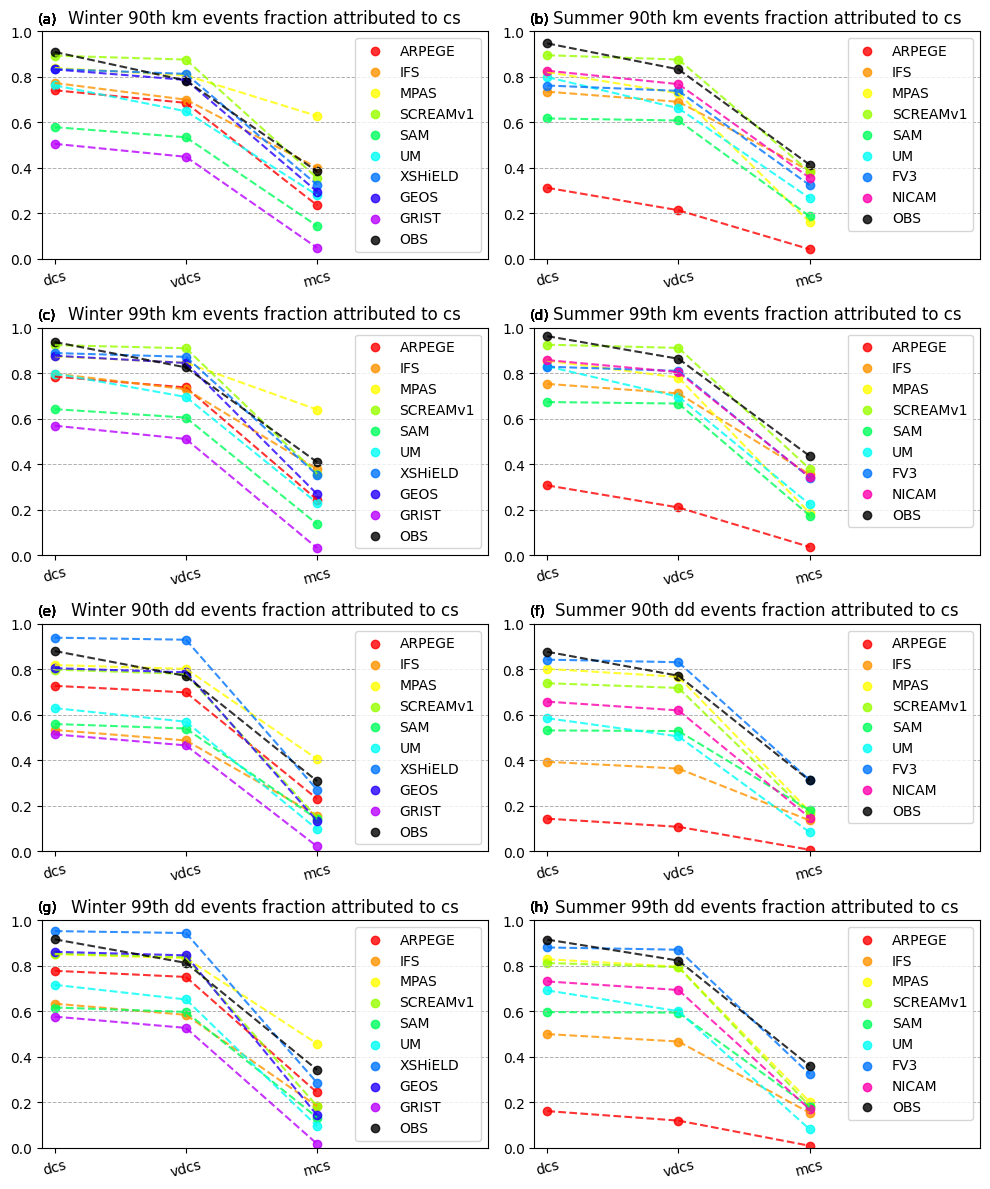

In [14]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(10, 12))
titles = ["90th km", "99th km", "90th dd", "99th dd"]
letters = ["("+chr(97 + i)+")" for i in range(8)]  

# Loop through the index i
for i, axs in enumerate(axes): # iterate over 
    for j, jd in enumerate(jds):
        model_name, season = jd.name.split("_")[0], jd.name.split("_")[1]
        if season == "Winter":
            ax = axs[0]
            letter = letters[2*i]
        elif season == "Summer":
            ax = axs[1]
            letter = letters[2*i+1]

        if model_name == "NICAM": ## also adjust GRIST and GEOS here
            color = model_colors[9]
        elif model_name == "OBS":
            color = "black"
        elif model_name == "GRIST":
            color = model_colors[8]
        else : 
            color = model_colors[j//2]

        for c, cloud_type in enumerate(cloud_cond_var_ids):                
            if c == 0: # special case where you pass label here
                ax.scatter([c], results[c, i, j], color=color, label=model_name, alpha = 0.8)
                ax.plot([c, c+1], [results[c, i, j], results[c+1, i, j]], color = color, linestyle = "--", alpha = 0.8)
            elif c!=2:
                # Scatter plot for winter coefficients without labels
                ax.scatter([c], results[c, i, j], color=color,  alpha = 0.8)
                ax.plot([c, c+1], [results[c, i, j], results[c+1, i, j]], color = color, linestyle = "--", alpha = 0.8)
            else : 
                ax.scatter([c], results[c, i, j], color=color, alpha = 0.8)
                 
        ax.legend() 
        ax.set_ybound(0,1)
        ax.set_xbound(-0.1, 3.3)
        ax.set_xticks([0, 1, 2])
        ax.set_xticklabels(["dcs", "vdcs", "mcs"], rotation = 15)
        ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
        ax.set_title(season+" "+titles[i]+" events fraction attributed to cs")
        ax.text(-0.01, 1.04, letter,  transform=ax.transAxes) #, fontweight='bold'

# Show the plot
plt.tight_layout()
plt.show()